<a href="https://colab.research.google.com/github/alvaroguerrero1/alvaro/blob/master/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Upload dataset
from google.colab import files
uploaded =files.upload()

Saving hcvdat0.csv to hcvdat0.csv


In [3]:
#Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt #to create plots
import seaborn as sns
import matplotlib.pyplot as plt

#it reads the file ans show the head
df=pd.read_csv("hcvdat0.csv", index_col = [0])
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


**1) Data description**

**1.1) Problem description**

**1.1.1) What is the data about.**

The data is related to blood donors and patients with Hepatitis C. It includes various laboratory values and demographic information such as age and sex.

**1.1.2) Features**

The features in the dataset include:

Age: Age of the individual.

Sex: Gender of the individual.

ALB: Albumin level.

ALP: Alkaline phosphatase level.

ALT: Alanine aminotransferase level.

AST: Aspartate aminotransferase level.

BIL: Bilirubin level.

CHE: Cholinesterase level.

CHOL: Cholesterol level.

CREA: Creatinine level.

GGT: Gamma-glutamyl transferase level.

PROT: Protein level.

**1.1.3) Target variables:**

The target variable is the "Category" variable, which indicates the health status of the individual:

'0=Blood Donor': Indicates the individual is a blood donor.

'0s=suspect Blood Donor': Indicates the individual is a suspect blood donor.

'1=Hepatitis': Indicates the individual has Hepatitis.

'2=Fibrosis': Indicates the individual has fibrosis.

'3=Cirrhosis': Indicates the individual has cirrhosis.

**1.2) Fields**

**1.2.1) Description:**

The data contains 615 observations and 14 attributes of blood donors and Hepatitis C patients laboratory and demographic values.


In [4]:
#1.2.2) Type
df.info() #gives the type of the data

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [5]:
# 1.2.3) & 1.2.4)
df.describe()

#df['Age'].mean() #to find the mean of the column "Age"
#df['Sex'].value_counts() #to find the number of values

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


**1.2) Graphs**

**1.3.1) Distribution of important features**

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

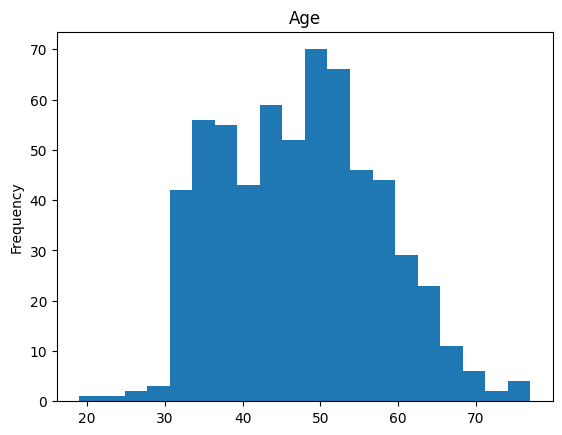

In [6]:
#df.Age.value_counts()
df['Age'].plot(kind='hist', bins=20, title='Age') #histogram: distribution of age

In [7]:
df["Sex"] = df["Sex"].replace("m", 1)
df["Sex"] = df["Sex"].replace("f", 0)
df.Sex.value_counts()
#df['Sex'].plot(kind='hist', bins=20, title='Age') #histogram: distribution of age

Sex
1    377
0    238
Name: count, dtype: int64

**1.3.2) Distribution of the target**

In [8]:
df.Category.value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

<Axes: ylabel='Category'>

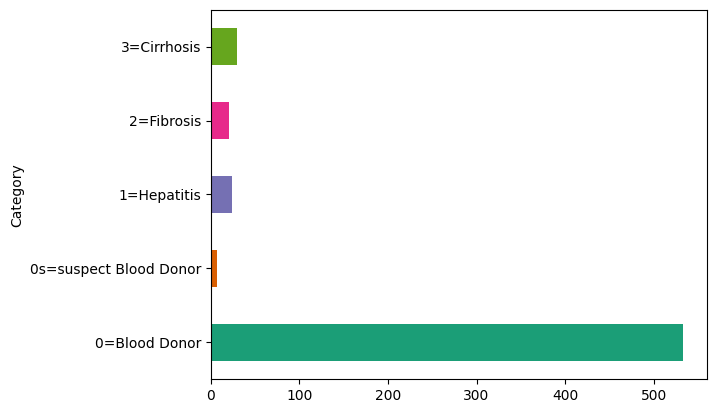

In [9]:
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

**2) Data exploration**

**2.1) Preprocessing **

**2.1.1) Identify missing values**

In [10]:
null=pd.isnull(df) #to convert the missing values in caracters as true and false
null

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,False,False,False
614,False,False,False,False,True,False,False,False,False,False,False,False,False


In [11]:
missing_values = df.isnull().sum()
missing_values += (df == '').sum()

print(missing_values)

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [12]:
df.isnull().sum().sum()

31

In [13]:
#This code snippet fills missing values (NaNs) in the 'columns'
#of DataFrame with the mean value of the 'column' and modifies the DataFrame in place
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)

In [14]:
#here we are replacing all the hepatitis cases with just 1 value
df["Category"] = df["Category"].replace("0=Blood Donor", 0)
df["Category"] = df["Category"].replace("0s=suspect Blood Donor", -1)
df["Category"] = df["Category"].replace("1=Hepatitis", 1)
df["Category"] = df["Category"].replace("2=Fibrosis", 1)
df["Category"] = df["Category"].replace("3=Cirrhosis", 1)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,1,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,1,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,1,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,1,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,1,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1,62,0,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,1,64,0,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,1,64,0,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,1,46,0,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [15]:
# it removes the suspected cases, just to avoid more uncertanty in the dataset
df = df[df.iloc[:, 0] != -1]

In [16]:
df.info()
df.Category.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    int64  
 1   Age       608 non-null    int64  
 2   Sex       608 non-null    int64  
 3   ALB       608 non-null    float64
 4   ALP       608 non-null    float64
 5   ALT       608 non-null    float64
 6   AST       608 non-null    float64
 7   BIL       608 non-null    float64
 8   CHE       608 non-null    float64
 9   CHOL      608 non-null    float64
 10  CREA      608 non-null    float64
 11  GGT       608 non-null    float64
 12  PROT      608 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 66.5 KB


Category
0    533
1     75
Name: count, dtype: int64

**2.1.2) Identify outliers**

In [17]:
import pandas as pd

# Assuming df is your DataFrame

# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers in each column
outliers_per_column = df.apply(detect_outliers)

# Count outliers in the 'ALP' column
outliers_ALB_count = outliers_per_column['ALB'].count()
outliers_ALP_count = outliers_per_column['ALP'].count()
outliers_AST_count = outliers_per_column['AST'].count()
outliers_BIL_count = outliers_per_column['BIL'].count()
outliers_CHE_count = outliers_per_column['CHE'].count()
outliers_CHOL_count = outliers_per_column['CHOL'].count()
outliers_CREA_count = outliers_per_column['CREA'].count()
outliers_GGT_count = outliers_per_column['GGT'].count()
outliers_PROT_count = outliers_per_column['PROT'].count()

# Print outliers count in the 'ALP' column
print('# of outliers')
print("ALB:", outliers_ALB_count)
print("ALP:", outliers_ALP_count)
print("AST:", outliers_AST_count)
print("BIL:", outliers_BIL_count)
print("CHE:", outliers_CHE_count)
print("CHOL:", outliers_CHOL_count)
print("CREA:", outliers_CREA_count)
print("GGT:", outliers_GGT_count)
print("PROT:", outliers_PROT_count)


# of outliers
ALB: 22
ALP: 12
AST: 61
BIL: 46
CHE: 23
CHOL: 12
CREA: 10
GGT: 68
PROT: 15


**2.2) Visualization**

**2.2.1) Distribution of features**

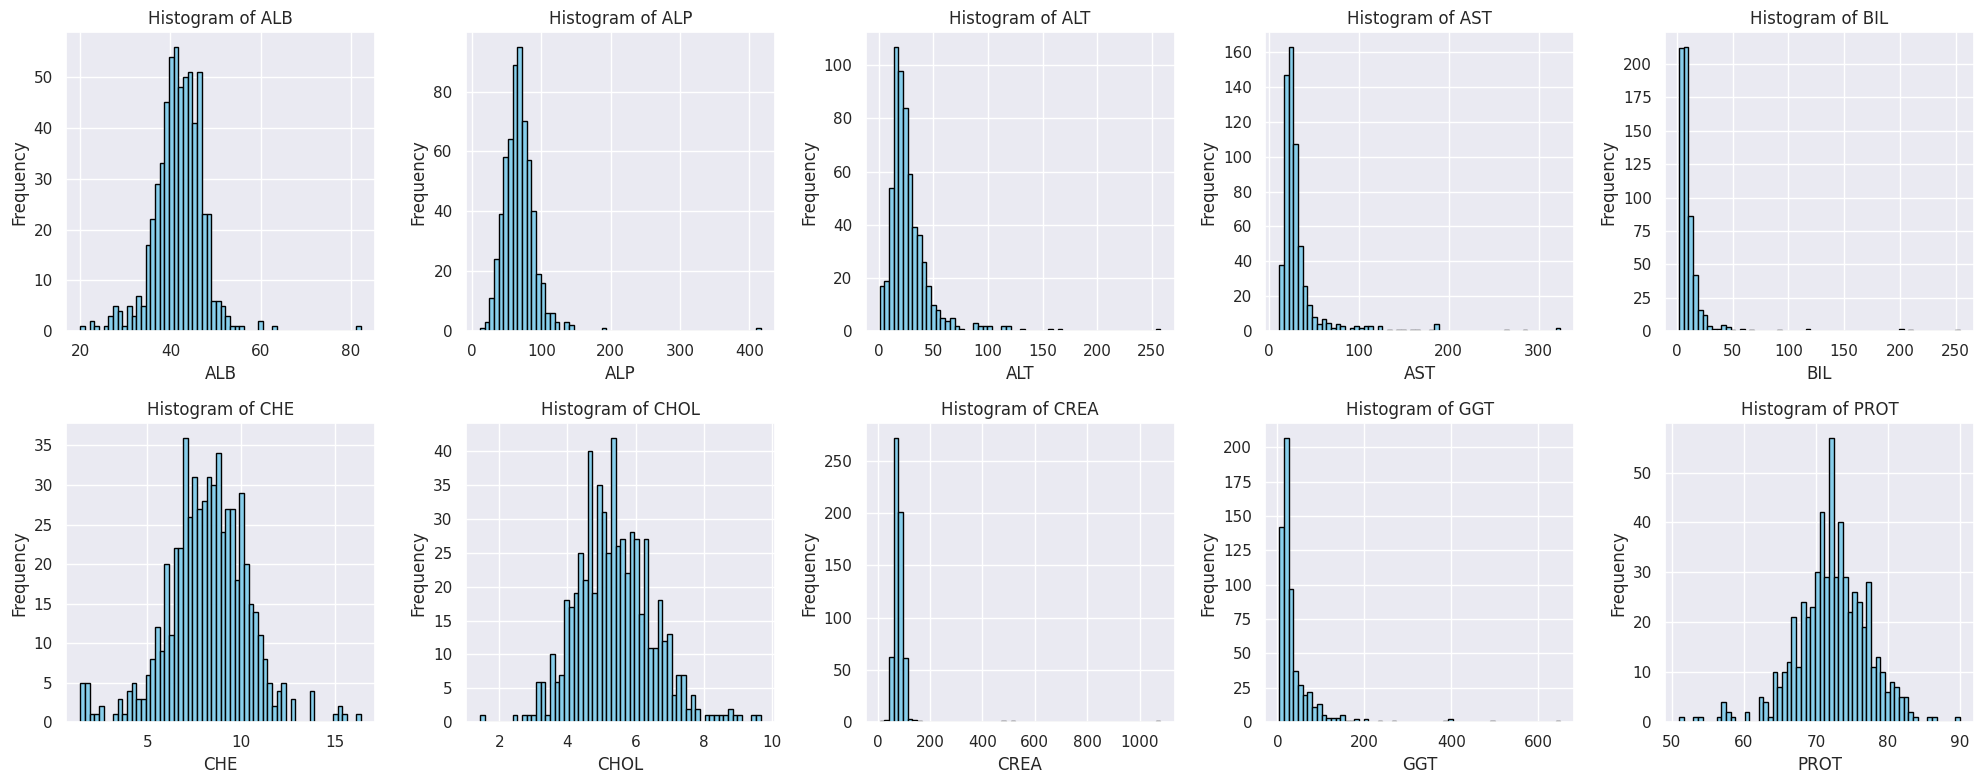

In [37]:
features = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()

# Plot histograms for each feature
for i, feature in enumerate(features):
    axs[i].hist(df[feature], bins=60, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**2.2.2) Pairwise relations**

**2.3) Statisitics**

**2.3.1) Correlation**

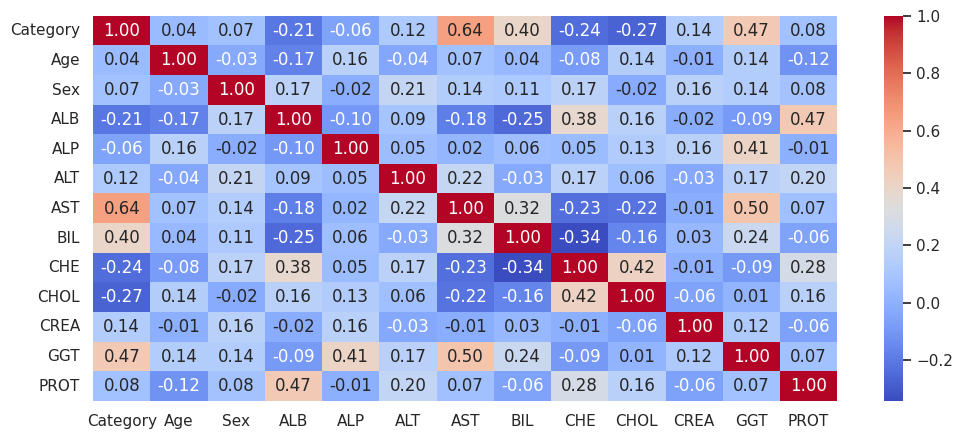

In [19]:
df.corr()
sns.set(rc={'figure.figsize':(12,5)})
table = sns.heatmap(df.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

**Pairwise**

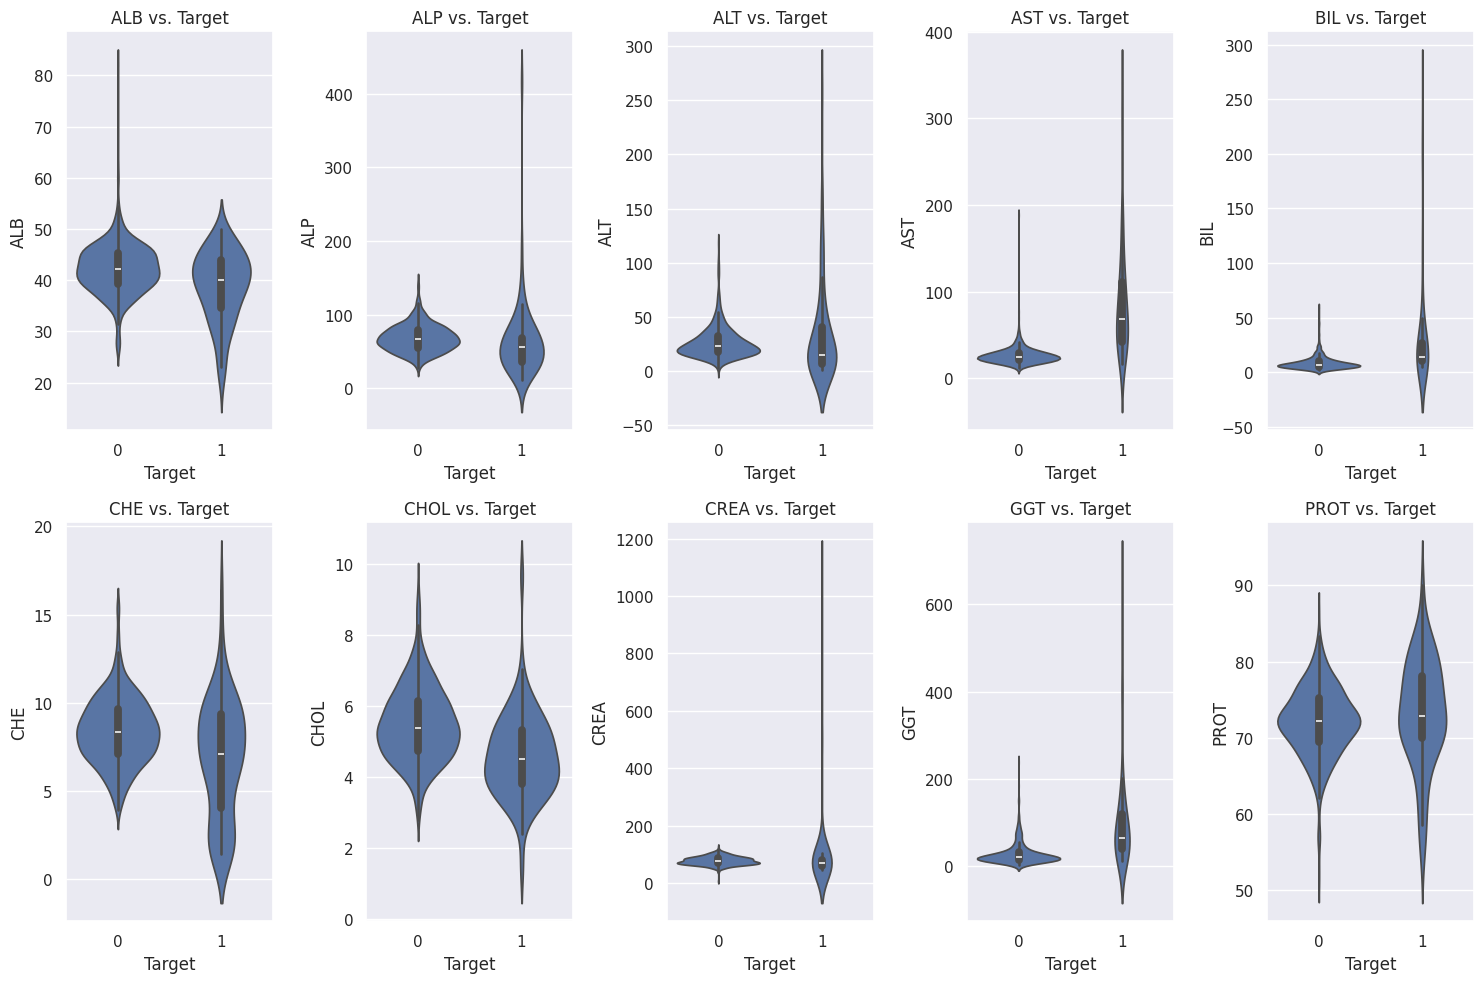

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each feature and create box plots
for i, feature in enumerate(features, start=1):
    plt.subplot(2, 5, i)
    sns.violinplot(x='Category', y=feature, data=df)
    plt.title(f'{feature} vs. Target')
    plt.xlabel('Target')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**4) Chose model**

**Split test and test sets**

In [21]:
from sklearn.model_selection import train_test_split

#here we will select the best features
#selected_features = ['ALB', 'AST', 'BIL', 'CHE', 'CHOL', 'GGT']

# Extract the selected features and the target variable from the DataFrame
#X = df[selected_features]
#y = df['Category']
#X_train , X_test , y_train , y_test = train_test_split(X, y,test_size=0.2 ,stratify= df["Category"], random_state=16 , shuffle=True)

X_train , X_test , y_train , y_test = train_test_split(df.drop("Category", axis = 1), df["Category"],test_size=0.2 ,stratify= df["Category"], random_state=16 , shuffle=True)
# e.g. stratify=hepC["Category"] will ensure that both the training and testing sets have a similar proportion of "positive" and "negative" instances.

In [31]:
print(y_train.value_counts())
print(y_test.value_counts())

Category
0    426
1     60
Name: count, dtype: int64
Category
0    107
1     15
Name: count, dtype: int64


when the counts of different categories are unequal, the classes are considered unbalanced. In machine learning, this imbalance can lead to issues such as biased models, where the model may have a tendency to predict the majority class more often than the minority class.

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,59,0,40.000000,68.400000,13.200000,20.300000,8.200000,9.100000,6.380000,63.000000,16.300000,71.900000
1,59,1,36.000000,49.700000,5.200000,110.100000,37.000000,2.290000,3.680000,118.200000,56.900000,74.800000
2,40,1,39.100000,66.500000,33.300000,32.900000,14.800000,7.870000,4.910000,88.000000,18.500000,68.800000
3,36,0,46.400000,69.100000,17.700000,24.300000,6.600000,6.500000,5.620000,67.000000,18.500000,75.500000
4,54,1,46.000000,70.200000,18.600000,24.700000,24.100000,7.830000,6.240000,76.000000,24.300000,76.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
847,58,0,23.257903,104.877872,4.532614,102.728838,37.068235,1.732945,2.559900,62.777371,35.900000,64.992174
848,56,1,34.803787,43.137917,5.524686,108.698722,35.974674,2.194303,3.685127,111.108165,58.386722,73.979740
849,31,0,43.662714,28.904151,6.020090,23.691628,7.325427,7.506264,4.884981,57.607116,19.585105,76.973980
850,64,0,24.353120,101.705328,2.942374,48.256071,21.977472,1.548475,3.063081,63.261309,37.898660,72.055677


In [24]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

Category
0    426
1     60
Name: count, dtype: int64
Category
0    426
1    426
Name: count, dtype: int64


After balancing the classes using SMOTE, we can proceed with choosing and training machine learning models

**Choose Machine Learning Model**

In [25]:
#libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

In [26]:
gradient_boosting_model = GradientBoostingClassifier(random_state=16)

# Train the model
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)
# Make predictions on the testing data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
# Evaluate the model
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gradient_boosting))

logistic_model = LogisticRegression(max_iter=100000,random_state=16)
# Train the model
logistic_model.fit(X_train_resampled, y_train_resampled)
# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test)
# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

model = DecisionTreeClassifier(random_state=16)
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Evaluate the model
print("Decision Tree:")
print(classification_report(y_test, y_pred))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_pred_knn = knn_model.predict(X_test)
# Evaluate the model
print("K-neighbors:")
print(classification_report(y_test, y_pred_knn))

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_pred_lda = lda_model.predict(X_test)
# Evaluate the model
print("Linear Discriminant Analysis:")
print(classification_report(y_test, y_pred_lda))

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       107
           1       0.78      0.93      0.85        15

    accuracy                           0.96       122
   macro avg       0.88      0.95      0.91       122
weighted avg       0.96      0.96      0.96       122

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.62      0.67      0.65        15

    accuracy                           0.91       122
   macro avg       0.79      0.81      0.80       122
weighted avg       0.91      0.91      0.91       122

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.87      0.87      0.87        15

    accuracy                           0.97       122
   macro avg       0.92      0.92      0.92       122
weighted avg       

MaxVoting, also known as Majority Voting, is an ensemble technique that combines predictions from multiple machine learning models and selects the class with the most votes as the final prediction.  The effectiveness of MaxVoting depends on the diversity and quality of the individual models included in the ensemble

In [27]:
from sklearn.ensemble import VotingClassifier

# Define individual models
model1 = GradientBoostingClassifier(random_state=42)
model2 = LogisticRegression(random_state=42, max_iter=1000)
model3 = DecisionTreeClassifier(random_state=42)
model4 = RandomForestClassifier(random_state=42)
model5 = KNeighborsClassifier()
model6 = LinearDiscriminantAnalysis()

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('gb', model1),
        ('lr', model2),
        ('dt', model3),
        ('rf', model4),
        ('knn', model5),
        ('lda', model6)
    ],
    voting='hard'  # Use 'hard' voting to consider majority vote
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.83      0.67      0.74        15

    accuracy                           0.94       122
   macro avg       0.89      0.82      0.85       122
weighted avg       0.94      0.94      0.94       122



In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize individual classifiers
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

# Create a voting classifier with 'hard' voting strategy (predicts class labels)
voting_clf = VotingClassifier(estimators=[('gb', gb_clf), ('dt', dt_clf)], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = voting_clf.predict(X_test)

# Evaluate the voting classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.86      0.80      0.83        15

    accuracy                           0.96       122
   macro avg       0.91      0.89      0.90       122
weighted avg       0.96      0.96      0.96       122



In [29]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lda', LinearDiscriminantAnalysis())
]

# Initialize the stacking classifier with the base models and the meta classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()  # Use Logistic Regression as the meta classifier
)

# Train the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the performance of the stacking classifier
print(classification_report(y_test, y_pred_stacking))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.85      0.73      0.79        15

    accuracy                           0.95       122
   macro avg       0.90      0.86      0.88       122
weighted avg       0.95      0.95      0.95       122

